In [1]:
#from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smdkc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smdkc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\smdkc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import pandas as pd

## Load Data

In [5]:
data = pd.read_csv("train.tsv",sep="\t")
data.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

In [6]:
data.Sentiment.unique()

array([1, 2, 3, 4, 0], dtype=int64)

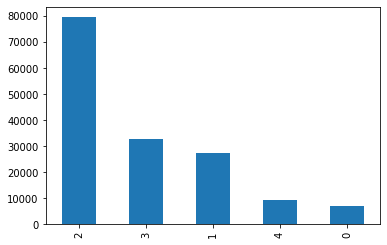

In [7]:
data.Sentiment.value_counts().plot.bar()

In [8]:
data["Sentiment"].replace(0,value="negative", inplace=True)
data["Sentiment"].replace(1,value="negative", inplace=True)

In [9]:
data["Sentiment"].replace(3,value="positive", inplace=True)
data["Sentiment"].replace(4,value="positive", inplace=True)

In [10]:
data.shape

(156060, 4)

In [11]:
data.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

  Sentiment  
0  negative  
1         2  
2         2  
3         2  
4         2

In [12]:
data = data[data["Sentiment"]!=2]

In [13]:
data.shape

(76478, 4)

In [14]:
data.sample(10)

PhraseId  SentenceId  \
93208      93209        4859   
72238      72239        3692   
29823      29824        1383   
37855      37856        1800   
145132    145133        7885   
97698      97699        5114   
9592        9593         399   
108175    108176        5723   
56276      56277        2821   
19367      19368         851   

                                                   Phrase Sentiment  
93208                                     offend everyone  negative  
72238        Depressingly thin and exhaustingly contrived  negative  
29823                                             tribute  positive  
37855   an intelligent , realistic portrayal of testin...  positive  
145132  directed - a powerful drama with enough sardon...  positive  
97698                   remembering this refreshing visit  positive  
9592                           would be very sweet indeed  positive  
108175  're looking for an intelligent movie in which ...  positive  
56276                you know the picture is in trouble .  negative  
19367   the slack complacency of -LRB- Godard 's -RRB-...  negative

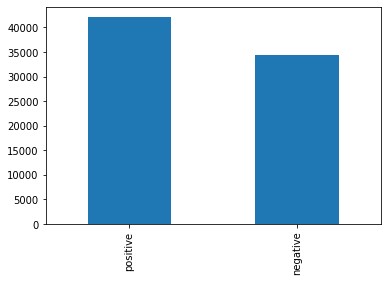

In [15]:
data.Sentiment.value_counts().plot.bar()

In [16]:
df = pd.DataFrame()

In [17]:
df["sentences"] = data["Phrase"]
df["label"] = data["Sentiment"]

In [18]:
df.head()

sentences     label
0   A series of escapades demonstrating the adage ...  negative
21                                 good for the goose  positive
22                                               good  positive
33  the gander , some of which occasionally amuses...  negative
46                                             amuses  positive

In [19]:
rare_words = pd.Series(' '.join(df['sentences']).split()).value_counts()[-100:]
df['sentences'] = df['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

In [20]:
rare_words

teen-oriented       1
Believes            1
lately              1
slasher-movie       1
Jam-packed          1
                   ..
Blake               1
Electric            1
Raccoons            1
Bond-inspired       1
creature-feature    1
Length: 100, dtype: int64

In [21]:
df.head()

sentences     label
0   A series of escapades demonstrating the adage ...  negative
21                                 good for the goose  positive
22                                               good  positive
33  the gander , some of which occasionally amuses...  negative
46                                             amuses  positive

## Text Preprocessing

In [23]:
# **Word Tokenization and lowercase**
df["sentences"]=df["sentences"].apply(lambda x: word_tokenize(x.lower()))
#**Remove Punctuation and numbers and chars like "*" and "#"**
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i.isalpha()))
# **Remove Stopwords**
stop_words = stopwords.words('english')
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i not in stop_words))
# **lemmatization**
lem=WordNetLemmatizer()
df["sentences"]=df["sentences"].apply(lambda x: list(lem.lemmatize(i) for i in x))
# join
df["sentences"]=df["sentences"].apply(lambda x: " ".join(x))

In [24]:
df.head()

sentences     label
0   series escapade demonstrating adage good goose...  negative
21                                         good goose  positive
22                                               good  positive
33  gander occasionally amuses none amount much story  negative
46                                             amuses  positive

In [25]:
df.iloc[0]

sentences    series escapade demonstrating adage good goose...
label                                                 negative
Name: 0, dtype: object

In [26]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df["sentences"],
                                                                   df["label"],
                                                                    random_state = 1)

In [27]:
X_train.head()

118788    present fascinating glimpse urban life class w...
89514     hey everybody wan na watch movie guy dressed c...
86857                               incredible number story
140626                         ultimately disappoint action
153243                                              unified
Name: sentences, dtype: object

In [28]:
encoder = preprocessing.LabelEncoder()

In [29]:
y_train = encoder.fit_transform(y_train)

In [30]:
y_test = encoder.fit_transform(y_test)

In [31]:
y_train[0:5]

array([1, 0, 1, 0, 1])

In [32]:
y_test[0:5]

array([1, 0, 1, 0, 0])

## count vectors

In [34]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [35]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [36]:
vectorizer.get_feature_names()[0:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [37]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## TF - IDF

In [39]:
tf_idf_word_vec = TfidfVectorizer()
tf_idf_word_vec.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [40]:
X_train_tfidf = tf_idf_word_vec.transform(X_train)
X_test_tfidf = tf_idf_word_vec.transform(X_test)

In [41]:
tf_idf_word_vec.get_feature_names()[0:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [42]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
a=pd.DataFrame(X_train_tfidf.toarray())

In [44]:
pd.set_option('display.max_columns', 1000)

In [45]:
a.head()

0      1      2      3      4      5      6      7      8      9      \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   10     11     12     13     14     15     16     17     18     19     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   20     21     22     23     24     25     26     27     28     29     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   30     31     32     33     34     35     36     37     38     39     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   40     41     42     43     44     45     46     47     48     49     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   50     51     52     53     54     55     56     57     58     59     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   60     61     62     63     64     65     66     67     68     69     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   70     71     72     73     74     75     76     77     78     79     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   80     81     82     83     84     85     86     87     88     89     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0

## Classification Models

#### Logistic Regression

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
# Make predictions
y_pred = log_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[7207 1436]
 [1011 9466]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      8643
           1       0.87      0.90      0.89     10477

    accuracy                           0.87     19120
   macro avg       0.87      0.87      0.87     19120
weighted avg       0.87      0.87      0.87     19120



In [50]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
log_accuracy_count = model_selection.cross_val_score(log_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", log_accuracy_count)

Count Vectors Accuracy: 0.8269874476987447


In [51]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_tfidf, y_train)
log_accuracy_tf = model_selection.cross_val_score(log_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", log_accuracy_tf)

TF-IDF Accuracy: 0.823326359832636


## XGBoost Classifier

In [53]:
import xgboost

In [54]:
from xgboost import XGBClassifier

In [55]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = xgb_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[4184 4459]
 [ 693 9784]]
              precision    recall  f1-score   support

           0       0.86      0.48      0.62      8643
           1       0.69      0.93      0.79     10477

    accuracy                           0.73     19120
   macro avg       0.77      0.71      0.71     19120
weighted avg       0.76      0.73      0.71     19120



In [56]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)
xgb_accuracy_count = model_selection.cross_val_score(xgb_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", xgb_accuracy_count)

Count Vectors Accuracy: 0.710460251046025


In [57]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_tfidf, y_train)
xgb_accuracy_tf = model_selection.cross_val_score(xgb_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", xgb_accuracy_tf)

TF-IDF Accuracy: 0.7017782426778243


## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = dsc_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[7168 1475]
 [1062 9415]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      8643
           1       0.86      0.90      0.88     10477

    accuracy                           0.87     19120
   macro avg       0.87      0.86      0.87     19120
weighted avg       0.87      0.87      0.87     19120



In [61]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_count , y_train)
dsc_accuracy_count = model_selection.cross_val_score(dsc_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", dsc_accuracy_count)

Count Vectors Accuracy: 0.7776673640167364


In [62]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_tfidf , y_train)
dsc_accuracy_tf = model_selection.cross_val_score(dsc_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", dsc_accuracy_tf)

TF-IDF Accuracy: 0.7723849372384938


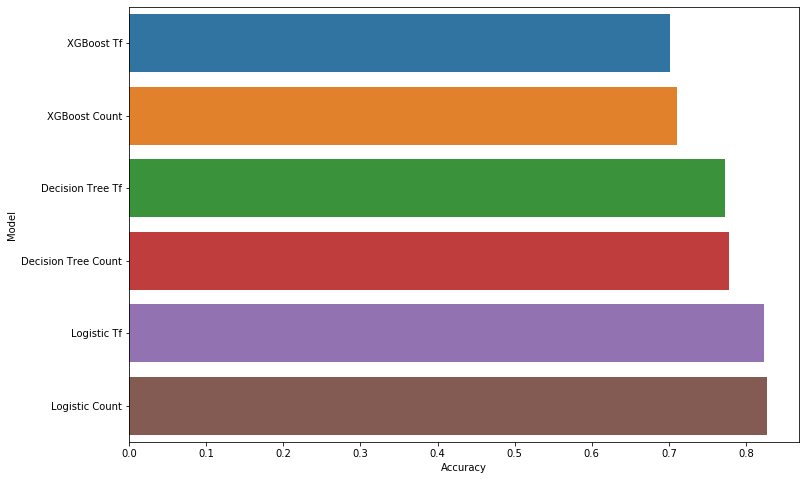

In [63]:
compare = pd.DataFrame({"Model": ["Logistic Count", "Logistic Tf", "XGBoost Count", "XGBoost Tf", "Decision Tree Count","Decision Tree Tf"],
                        "Accuracy": [log_accuracy_count, log_accuracy_tf, xgb_accuracy_count, xgb_accuracy_tf, dsc_accuracy_count,dsc_accuracy_tf]})
compare = compare.sort_values(by="Accuracy", ascending=True)
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)